# **Modeling**

# Part 1: Preparing the Data

In [544]:
import pandas as pd
import numpy as np
np.random.seed(4)
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [545]:
os.getcwd()

'/workspace'

In [546]:
data = pd.read_csv('Crime_Clean2.csv')

In [547]:
data.head()

,Unnamed: 0,Incident ID,City,Police District Name,Block,Crime Name1,Crime Name2,Crime Name3,Victims,Place,...,Other Race %,Month,Day,Hour_Minute,Hour,Hour_Y,Hour_X,Time_of_Day,Season,Weekday
0,0,201268391,GAITHERSBURG,GERMANTOWN,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Single Family,...,0.007143,12,2019-12-06,21:16,21,0.707107,-0.707107,Night,Fall,1.0
1,1,201234989,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Crime Against Person,Fondling,SEX OFFENSE - FONDLING,1,Residence - Single Family,...,0.007143,4,2019-04-13,02:00,2,0.866025,0.500000,Late Night,Spring,0.0
2,2,201281727,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Yard,...,0.007143,3,2020-03-13,09:09,9,-0.707107,0.707107,Morning,Winter,1.0
3,3,201265326,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Single Family,...,0.007143,11,2019-11-15,16:33,16,-0.500000,-0.866025,Late Afternoon/Early Evening,Fall,1.0
4,4,201090622,GAITHERSBURG,GERMANTOWN,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Street - Other,...,0.007143,7,2016-07-22,22:27,22,0.866025,-0.500000,Night,Summer,1.0


In [548]:
len(data)

235368

In [549]:
data.isnull().sum()

Unnamed: 0                   0
Incident ID                  0
City                       828
Police District Name         0
Block                        0
Crime Name1                165
Crime Name2                165
Crime Name3                165
Victims                      0
Place                        0
Pop                          0
Income                       0
Age                          0
Educational Attainment       0
Bachelors                    0
High School                  0
Means of Transportation      0
Public Transportation        0
Total Laborforce             0
Total Unemployed             0
Start_Date_Time              0
Location                     0
Longitude                    0
Latitude                     0
Male                         0
Female                       0
Black                        0
White                        0
Asian                        0
American Indian              0
Other Race                   0
High School %                0
Bachelor

In [550]:
##Exclude rows for which Crime Name1 is null

data = data[~data['Crime Name1'].isnull()]

In [551]:
data.isnull().sum()

Unnamed: 0                   0
Incident ID                  0
City                       828
Police District Name         0
Block                        0
Crime Name1                  0
Crime Name2                  0
Crime Name3                  0
Victims                      0
Place                        0
Pop                          0
Income                       0
Age                          0
Educational Attainment       0
Bachelors                    0
High School                  0
Means of Transportation      0
Public Transportation        0
Total Laborforce             0
Total Unemployed             0
Start_Date_Time              0
Location                     0
Longitude                    0
Latitude                     0
Male                         0
Female                       0
Black                        0
White                        0
Asian                        0
American Indian              0
Other Race                   0
High School %                0
Bachelor

In [552]:
## Exclude Other category from Analysis

data = data[data['Crime Name1'] != 'Other']
data = data[data['Crime Name1'] != 'Not a Crime']

In [553]:
classes_gen = data['Crime Name1'].value_counts()

top_classes_gen = list(classes_gen.index.values)

top_classes_gen = sorted(top_classes_gen)
top_classes_gen

['Crime Against Person', 'Crime Against Property', 'Crime Against Society']

In [554]:
data = data.drop(['Unnamed: 0','Educational Attainment','Bachelors','High School','Means of Transportation','Public Transportation',
          'Total Laborforce','Total Unemployed', 'Crime Name2','Male','Female','Black','White','Asian','Other Race',
                 'American Indian','Male %', 'Female %','American Indian %', 'Other Race %', 'Asian %','Month','Hour_Minute','Season',
                 'Hour_X','Hour_Y','Hour','City'],1)

In [555]:
data.columns

Index(['Incident ID', 'Police District Name', 'Block', 'Crime Name1',
       'Crime Name3', 'Victims', 'Place', 'Pop', 'Income', 'Age',
       'Start_Date_Time', 'Location', 'Longitude', 'Latitude', 'High School %',
       'Bachelors %', 'Public Transportation %', 'Unemployed %', 'White %',
       'Black %', 'Day', 'Time_of_Day', 'Weekday'],
      dtype='object')

# Create Geographical Clusters Based Purely on Locations

In [556]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=20, random_state=4).fit(data[['Latitude','Longitude']])
preds = clusterer.predict(data[['Latitude','Longitude']])
data['Cluster_No'] = preds

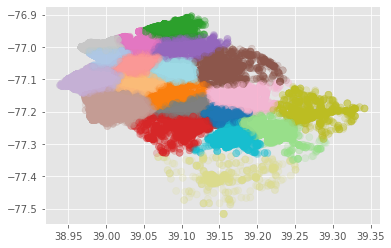

In [557]:
X = np.array(data[['Latitude','Longitude']], dtype='float64')
plt.scatter(X[:,0],X[:,1], alpha=0.2, s=50, c = data['Cluster_No'], cmap='tab20')
plt.show()

In [558]:
data_clust = data[['Cluster_No','Latitude','Longitude']]

data_clust2 = pd.DataFrame(data_clust.groupby(['Cluster_No']).mean())

In [559]:
data = pd.merge(data_clust2, data, how='left', on='Cluster_No')

In [560]:
data = data.drop(['Block','Location'],axis=1)

In [561]:
data.head()

,Cluster_No,Latitude_x,Longitude_x,Incident ID,Police District Name,Crime Name1,Crime Name3,Victims,Place,Pop,...,Latitude_y,High School %,Bachelors %,Public Transportation %,Unemployed %,White %,Black %,Day,Time_of_Day,Weekday
0,0,39.152632,-77.206552,201267436,MONTGOMERY VILLAGE,Crime Against Society,DRIVING UNDER THE INFLUENCE LIQUOR,1,Street - In vehicle,2111.0,...,39.149109,0.108555,0.312006,0.080184,0.033214,0.709398,0.043855,2019-11-22,Late Night,1.0
1,0,39.152632,-77.206552,201268261,MONTGOMERY VILLAGE,Crime Against Society,LIQUOR - POSSESS,1,Street - In vehicle,2111.0,...,39.149109,0.108555,0.312006,0.080184,0.033214,0.709398,0.043855,2019-12-06,Late Night,1.0
2,0,39.152632,-77.206552,201268261,MONTGOMERY VILLAGE,Crime Against Society,DRIVING UNDER THE INFLUENCE LIQUOR,1,Street - In vehicle,2111.0,...,39.149109,0.108555,0.312006,0.080184,0.033214,0.709398,0.043855,2019-12-06,Late Night,1.0
3,0,39.152632,-77.206552,201296384,MONTGOMERY VILLAGE,Crime Against Property,LARCENY - FROM AUTO,1,Street - Residential,920.0,...,39.138933,0.088983,0.194915,0.146293,0.056926,0.633886,0.004739,2020-07-29,Early Morning,1.0
4,0,39.152632,-77.206552,201088750,MONTGOMERY VILLAGE,Crime Against Property,ROBBERY - STREET-STRONG-ARM,1,Parking Lot - Other,920.0,...,39.141412,0.088983,0.194915,0.146293,0.056926,0.633886,0.004739,2016-07-12,Late Night,1.0


In [562]:
data['Crimes Against Society Count'] = 0
data['Crimes Against Property Count'] = 0
data['Crimes Against Persons Count'] = 0

# Group the Data by Cluster and Day

In [563]:
df = data.groupby(['Cluster_No','Day']).size().reset_index(name='Count')
df

,Cluster_No,Day,Count
0,0,2016-07-01,11
1,0,2016-07-02,35
2,0,2016-07-03,15
3,0,2016-07-04,9
4,0,2016-07-05,21
...,...,...,...
30697,19,2021-01-30,3
30698,19,2021-01-31,4
30699,19,2021-02-01,1
30700,19,2021-02-02,7


In [564]:
df2 = data.groupby(['Cluster_No','Day','Crime Name1']).size().reset_index(name='Count')
df2

,Cluster_No,Day,Crime Name1,Count
0,0,2016-07-01,Crime Against Person,2
1,0,2016-07-01,Crime Against Property,4
2,0,2016-07-01,Crime Against Society,5
3,0,2016-07-02,Crime Against Person,6
4,0,2016-07-02,Crime Against Property,11
...,...,...,...,...
63254,19,2021-01-31,Crime Against Property,3
63255,19,2021-02-01,Crime Against Property,1
63256,19,2021-02-02,Crime Against Person,1
63257,19,2021-02-02,Crime Against Property,6


In [565]:
df2 = data[data['Crime Name1'] == 'Crime Against Person'].groupby(['Cluster_No','Day']).size().reset_index(name='Crime Against Person Count')
df2

,Cluster_No,Day,Crime Against Person Count
0,0,2016-07-01,2
1,0,2016-07-02,6
2,0,2016-07-03,2
3,0,2016-07-04,1
4,0,2016-07-05,2
...,...,...,...
14081,19,2021-01-28,1
14082,19,2021-01-29,1
14083,19,2021-01-30,1
14084,19,2021-01-31,1


In [566]:
df2b = data[data['Crime Name1'] == 'Crime Against Property'].groupby(['Cluster_No','Day']).size().reset_index(name='Crime Against Property Count')
df2b

,Cluster_No,Day,Crime Against Property Count
0,0,2016-07-01,4
1,0,2016-07-02,11
2,0,2016-07-03,4
3,0,2016-07-04,3
4,0,2016-07-05,8
...,...,...,...
28320,19,2021-01-30,1
28321,19,2021-01-31,3
28322,19,2021-02-01,1
28323,19,2021-02-02,6


In [567]:
df2c = data[data['Crime Name1'] == 'Crime Against Society'].groupby(['Cluster_No','Day']).size().reset_index(name='Crime Against Society Count')
df2c

,Cluster_No,Day,Crime Against Society Count
0,0,2016-07-01,5
1,0,2016-07-02,18
2,0,2016-07-03,9
3,0,2016-07-04,5
4,0,2016-07-05,11
...,...,...,...
20843,19,2021-01-15,2
20844,19,2021-01-19,1
20845,19,2021-01-20,1
20846,19,2021-01-28,1


In [568]:
df3 = data.groupby(['Cluster_No','Day','Place']).size().reset_index(name='Count')
df3

,Cluster_No,Day,Place,Count
0,0,2016-07-01,Hotel/Motel/Etc.,1
1,0,2016-07-01,Other/Unknown,1
2,0,2016-07-01,Parking Lot - Residential,1
3,0,2016-07-01,Restaurant,1
4,0,2016-07-01,Retail - Department/Discount Store,1
...,...,...,...,...
134617,19,2021-02-02,Parking Lot - Residential,1
134618,19,2021-02-02,Residence - Apartment/Condo,1
134619,19,2021-02-02,Street - Residential,1
134620,19,2021-02-03,Residence - Driveway,1


In [569]:
df4 = data.groupby(['Cluster_No','Day','Time_of_Day']).size().reset_index(name='Count')
df4

,Cluster_No,Day,Time_of_Day,Count
0,0,2016-07-01,Afternoon,1
1,0,2016-07-01,Late Night,5
2,0,2016-07-01,Morning,1
3,0,2016-07-01,Night,4
4,0,2016-07-02,Afternoon,1
...,...,...,...,...
95707,19,2021-02-02,Late Night,2
95708,19,2021-02-02,Morning,2
95709,19,2021-02-02,Night,1
95710,19,2021-02-03,Late Afternoon/Early Evening,1


In [570]:
df5 = data.groupby(['Cluster_No','Day','Weekday']).size().reset_index(name='Count')
df5

,Cluster_No,Day,Weekday,Count
0,0,2016-07-01,1.0,11
1,0,2016-07-02,0.0,35
2,0,2016-07-03,0.0,15
3,0,2016-07-04,1.0,9
4,0,2016-07-05,1.0,21
...,...,...,...,...
30697,19,2021-01-30,0.0,3
30698,19,2021-01-31,0.0,4
30699,19,2021-02-01,1.0,1
30700,19,2021-02-02,1.0,7


In [571]:
df6 = data.groupby(['Cluster_No','Day'])
df6b = df6['Income'].mean().reset_index(name='Mean Income')
df6b


,Cluster_No,Day,Mean Income
0,0,2016-07-01,85389.272727
1,0,2016-07-02,70663.742857
2,0,2016-07-03,60633.666667
3,0,2016-07-04,62687.555556
4,0,2016-07-05,68942.952381
...,...,...,...
30697,19,2021-01-30,62305.000000
30698,19,2021-01-31,96935.500000
30699,19,2021-02-01,73159.000000
30700,19,2021-02-02,91998.285714


In [572]:
df6c = df6['Pop'].mean().reset_index(name='Mean Pop')
df6c

,Cluster_No,Day,Mean Pop
0,0,2016-07-01,2269.727273
1,0,2016-07-02,1649.914286
2,0,2016-07-03,2482.400000
3,0,2016-07-04,1824.111111
4,0,2016-07-05,1901.190476
...,...,...,...
30697,19,2021-01-30,2724.333333
30698,19,2021-01-31,2198.000000
30699,19,2021-02-01,1978.000000
30700,19,2021-02-02,1439.142857


In [573]:
df6d = df6['Public Transportation %'].mean().reset_index(name='Mean Public Transportation %')
df6d

,Cluster_No,Day,Mean Public Transportation %
0,0,2016-07-01,0.105908
1,0,2016-07-02,0.086069
2,0,2016-07-03,0.106510
3,0,2016-07-04,0.155012
4,0,2016-07-05,0.100541
...,...,...,...
30697,19,2021-01-30,0.179354
30698,19,2021-01-31,0.197263
30699,19,2021-02-01,0.217012
30700,19,2021-02-02,0.108646


In [574]:
df6e = df6['Victims'].mean().reset_index(name='Mean Victims')
df6e

,Cluster_No,Day,Mean Victims
0,0,2016-07-01,1.090909
1,0,2016-07-02,1.057143
2,0,2016-07-03,1.066667
3,0,2016-07-04,1.111111
4,0,2016-07-05,1.047619
...,...,...,...
30697,19,2021-01-30,1.333333
30698,19,2021-01-31,1.000000
30699,19,2021-02-01,1.000000
30700,19,2021-02-02,1.142857


In [575]:
df_final = pd.merge(df, df6b, how='left', on=['Cluster_No','Day'])
df_final.head()

,Cluster_No,Day,Count,Mean Income
0,0,2016-07-01,11,85389.272727
1,0,2016-07-02,35,70663.742857
2,0,2016-07-03,15,60633.666667
3,0,2016-07-04,9,62687.555556
4,0,2016-07-05,21,68942.952381


In [576]:
df_final = pd.merge(df_final, df6c, how='left', on=['Cluster_No','Day'])
df_final = pd.merge(df_final, df6d, how='left', on=['Cluster_No','Day'])
df_final = pd.merge(df_final, df6e, how='left', on=['Cluster_No','Day'])
df_final.head()

,Cluster_No,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims
0,0,2016-07-01,11,85389.272727,2269.727273,0.105908,1.090909
1,0,2016-07-02,35,70663.742857,1649.914286,0.086069,1.057143
2,0,2016-07-03,15,60633.666667,2482.400000,0.106510,1.066667
3,0,2016-07-04,9,62687.555556,1824.111111,0.155012,1.111111
4,0,2016-07-05,21,68942.952381,1901.190476,0.100541,1.047619


In [577]:
df_final2 = pd.merge(data_clust2, df_final, how='left', on='Cluster_No')
df_final2

,Cluster_No,Latitude,Longitude,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims
0,0,39.152632,-77.206552,2016-07-01,11,85389.272727,2269.727273,0.105908,1.090909
1,0,39.152632,-77.206552,2016-07-02,35,70663.742857,1649.914286,0.086069,1.057143
2,0,39.152632,-77.206552,2016-07-03,15,60633.666667,2482.400000,0.106510,1.066667
3,0,39.152632,-77.206552,2016-07-04,9,62687.555556,1824.111111,0.155012,1.111111
4,0,39.152632,-77.206552,2016-07-05,21,68942.952381,1901.190476,0.100541,1.047619
...,...,...,...,...,...,...,...,...,...
30697,19,39.083249,-77.072593,2021-01-30,3,62305.000000,2724.333333,0.179354,1.333333
30698,19,39.083249,-77.072593,2021-01-31,4,96935.500000,2198.000000,0.197263,1.000000
30699,19,39.083249,-77.072593,2021-02-01,1,73159.000000,1978.000000,0.217012,1.000000
30700,19,39.083249,-77.072593,2021-02-02,7,91998.285714,1439.142857,0.108646,1.142857


In [578]:
df_final2 = pd.merge(df_final2,df2, how='left', on=['Cluster_No','Day'])
df_final2

,Cluster_No,Latitude,Longitude,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count
0,0,39.152632,-77.206552,2016-07-01,11,85389.272727,2269.727273,0.105908,1.090909,2.0
1,0,39.152632,-77.206552,2016-07-02,35,70663.742857,1649.914286,0.086069,1.057143,6.0
2,0,39.152632,-77.206552,2016-07-03,15,60633.666667,2482.400000,0.106510,1.066667,2.0
3,0,39.152632,-77.206552,2016-07-04,9,62687.555556,1824.111111,0.155012,1.111111,1.0
4,0,39.152632,-77.206552,2016-07-05,21,68942.952381,1901.190476,0.100541,1.047619,2.0
...,...,...,...,...,...,...,...,...,...,...
30697,19,39.083249,-77.072593,2021-01-30,3,62305.000000,2724.333333,0.179354,1.333333,1.0
30698,19,39.083249,-77.072593,2021-01-31,4,96935.500000,2198.000000,0.197263,1.000000,1.0
30699,19,39.083249,-77.072593,2021-02-01,1,73159.000000,1978.000000,0.217012,1.000000,NaN
30700,19,39.083249,-77.072593,2021-02-02,7,91998.285714,1439.142857,0.108646,1.142857,1.0


In [579]:
df_final2 = pd.merge(df_final2,df2b, how='left', on=['Cluster_No','Day'])
df_final2

,Cluster_No,Latitude,Longitude,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,Crime Against Property Count
0,0,39.152632,-77.206552,2016-07-01,11,85389.272727,2269.727273,0.105908,1.090909,2.0,4.0
1,0,39.152632,-77.206552,2016-07-02,35,70663.742857,1649.914286,0.086069,1.057143,6.0,11.0
2,0,39.152632,-77.206552,2016-07-03,15,60633.666667,2482.400000,0.106510,1.066667,2.0,4.0
3,0,39.152632,-77.206552,2016-07-04,9,62687.555556,1824.111111,0.155012,1.111111,1.0,3.0
4,0,39.152632,-77.206552,2016-07-05,21,68942.952381,1901.190476,0.100541,1.047619,2.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...
30697,19,39.083249,-77.072593,2021-01-30,3,62305.000000,2724.333333,0.179354,1.333333,1.0,1.0
30698,19,39.083249,-77.072593,2021-01-31,4,96935.500000,2198.000000,0.197263,1.000000,1.0,3.0
30699,19,39.083249,-77.072593,2021-02-01,1,73159.000000,1978.000000,0.217012,1.000000,NaN,1.0
30700,19,39.083249,-77.072593,2021-02-02,7,91998.285714,1439.142857,0.108646,1.142857,1.0,6.0


In [580]:
df_final2 = pd.merge(df_final2,df2c, how='left', on=['Cluster_No','Day'])
df_final2

,Cluster_No,Latitude,Longitude,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,Crime Against Property Count,Crime Against Society Count
0,0,39.152632,-77.206552,2016-07-01,11,85389.272727,2269.727273,0.105908,1.090909,2.0,4.0,5.0
1,0,39.152632,-77.206552,2016-07-02,35,70663.742857,1649.914286,0.086069,1.057143,6.0,11.0,18.0
2,0,39.152632,-77.206552,2016-07-03,15,60633.666667,2482.400000,0.106510,1.066667,2.0,4.0,9.0
3,0,39.152632,-77.206552,2016-07-04,9,62687.555556,1824.111111,0.155012,1.111111,1.0,3.0,5.0
4,0,39.152632,-77.206552,2016-07-05,21,68942.952381,1901.190476,0.100541,1.047619,2.0,8.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
30697,19,39.083249,-77.072593,2021-01-30,3,62305.000000,2724.333333,0.179354,1.333333,1.0,1.0,1.0
30698,19,39.083249,-77.072593,2021-01-31,4,96935.500000,2198.000000,0.197263,1.000000,1.0,3.0,NaN
30699,19,39.083249,-77.072593,2021-02-01,1,73159.000000,1978.000000,0.217012,1.000000,NaN,1.0,NaN
30700,19,39.083249,-77.072593,2021-02-02,7,91998.285714,1439.142857,0.108646,1.142857,1.0,6.0,NaN


In [581]:
def func(data, df_final):
    
    for place in np.unique(data['Place']):
        
        df2 = data[data['Place'] == place].groupby(['Cluster_No','Day']).size().reset_index(name=place + " Count")
        df_final = pd.merge(df_final,df2, how='left', on=['Cluster_No','Day'])
        
    return df_final

In [582]:
df_final3 = func(data,df_final2)
df_final3.shape

(30702, 95)

In [583]:
df_final3.head()

,Cluster_No,Latitude,Longitude,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,...,Retail - Video Store Count,School/College Count,Street - Alley Count,Street - Bus Stop Count,Street - Commercial Count,Street - In vehicle Count,Street - Other Count,Street - Residential Count,Theater Count,Wooded Area Count
0,0,39.152632,-77.206552,2016-07-01,11,85389.272727,2269.727273,0.105908,1.090909,2.0,...,NaN,NaN,NaN,NaN,1.0,4.0,NaN,NaN,NaN,NaN
1,0,39.152632,-77.206552,2016-07-02,35,70663.742857,1649.914286,0.086069,1.057143,6.0,...,NaN,NaN,NaN,NaN,2.0,9.0,NaN,8.0,NaN,NaN
2,0,39.152632,-77.206552,2016-07-03,15,60633.666667,2482.400000,0.106510,1.066667,2.0,...,NaN,NaN,NaN,NaN,1.0,5.0,NaN,1.0,NaN,NaN
3,0,39.152632,-77.206552,2016-07-04,9,62687.555556,1824.111111,0.155012,1.111111,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,0,39.152632,-77.206552,2016-07-05,21,68942.952381,1901.190476,0.100541,1.047619,2.0,...,NaN,NaN,NaN,3.0,NaN,4.0,NaN,1.0,NaN,NaN


In [584]:
len(df_final3)

30702

In [585]:
data = df_final3.copy()

In [586]:
rand = data[data['Cluster_No'] == 0]
len(rand)

1679

In [587]:
data['Day'] = pd.to_datetime(data['Day'])
data['Day']

0       2016-07-01
1       2016-07-02
2       2016-07-03
3       2016-07-04
4       2016-07-05
           ...    
30697   2021-01-30
30698   2021-01-31
30699   2021-02-01
30700   2021-02-02
30701   2021-02-03
Name: Day, Length: 30702, dtype: datetime64[ns]

# Create and Implement Rolling Window Functions for Each Cluster by Creating Dataframes for Each Cluster

In [588]:
np.unique(data['Cluster_No'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [589]:
def cluster_week_func(data):
    
    dataframe_list = []
    
    for cluster in np.unique(data['Cluster_No']):
        
        data_new = data[data['Cluster_No'] == cluster].copy()
    
        data_new = data_new.set_index('Day')
        data_new = data_new['2016-07-01':'2021-02-05'].resample('W').sum()
        
        dataframe_list.append(data_new)
        
    return dataframe_list

In [590]:
def crime_count_func(dataframe_list):
    
    for data_new in dataframe_list:
        
        data_new['4 Rolling Crimes Against Society Mean'] = data_new['Crime Against Society Count'].shift(1).rolling(4).mean()
        data_new['4 Rolling Crimes Against Property Mean'] = data_new['Crime Against Property Count'].shift(1).rolling(4).mean()
        data_new['4 Rolling Crimes Against Persons Mean'] = data_new['Crime Against Person Count'].shift(1).rolling(4).mean()

        data_new['2 Rolling Crimes Against Society Mean'] = data_new['Crime Against Society Count'].shift(1).rolling(2).mean()
        data_new['2 Rolling Crimes Against Property Mean'] = data_new['Crime Against Property Count'].shift(1).rolling(2).mean()
        data_new['2 Rolling Crimes Against Persons Mean'] = data_new['Crime Against Person Count'].shift(1).rolling(2).mean()
        
    return dataframe_list

In [591]:
data_final = cluster_week_func(data)
data_final = crime_count_func(data_final)

In [592]:
len(data_final)

20

In [593]:
data_final[0].head(9)

,Cluster_No,Latitude,Longitude,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,Crime Against Property Count,...,Street - Other Count,Street - Residential Count,Theater Count,Wooded Area Count,4 Rolling Crimes Against Society Mean,4 Rolling Crimes Against Property Mean,4 Rolling Crimes Against Persons Mean,2 Rolling Crimes Against Society Mean,2 Rolling Crimes Against Property Mean,2 Rolling Crimes Against Persons Mean
Day,,,,,,,,,,,,,,,,,,,,,
2016-07-03,0,117.457895,-231.619656,61,216686.682251,6402.041558,0.298487,3.214719,10.0,19.0,...,0.0,9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-10,0,274.068421,-540.445865,92,500094.020771,14449.779051,0.845599,7.765606,13.0,43.0,...,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-17,0,274.068421,-540.445865,91,552803.882168,14578.440457,0.780436,7.142857,11.0,52.0,...,2.0,5.0,0.0,1.0,NaN,NaN,NaN,34.0,31.0,11.5
2016-07-24,0,274.068421,-540.445865,79,515386.071501,14083.997619,0.724192,7.100000,13.0,38.0,...,4.0,2.0,0.0,1.0,NaN,NaN,NaN,32.0,47.5,12.0
2016-07-31,0,274.068421,-540.445865,70,486299.571154,15771.551068,0.786254,7.111111,10.0,35.0,...,3.0,1.0,0.0,0.0,31.00,38.00,11.75,28.0,45.0,12.0
2016-08-07,0,274.068421,-540.445865,94,507111.783892,15094.513492,0.760349,7.318056,11.0,44.0,...,3.0,2.0,0.0,0.0,29.25,42.00,11.75,26.5,36.5,11.5
2016-08-14,0,274.068421,-540.445865,81,519473.461081,15552.352946,0.748780,7.434524,9.0,49.0,...,2.0,3.0,0.0,0.0,30.00,42.25,11.25,32.0,39.5,10.5
2016-08-21,0,274.068421,-540.445865,86,542655.717262,15214.464286,0.799945,7.125000,6.0,46.0,...,1.0,6.0,0.0,0.0,28.75,41.50,10.75,31.0,46.5,10.0
2016-08-28,0,274.068421,-540.445865,106,522436.463588,15058.496255,0.827174,7.062500,11.0,54.0,...,3.0,4.0,0.0,0.0,30.25,43.50,9.00,28.5,47.5,7.5


In [594]:
len(data_final[0])

241

In [595]:
data_final[0]['4 Rolling Crimes Against Property Mean'].isnull().sum()

4

In [596]:
for i in range(len(data_final)):
    data_final[i].replace([np.inf, -np.inf], np.nan, inplace=True)
    data_final[i].fillna(0,inplace=True)

In [597]:
data_final[0]['4 Rolling Crimes Against Property Mean'].isnull().sum()

0

In [598]:
## Create function to get the labels for each crime type for each cluster

def get_labels(data):

    labels1 = []
    labels2 = []
    labels3 = []

    for i in range(len(data_final)):
        label1 = np.array(data[i]['Crime Against Society Count'])
        label2 = np.array(data[i]['Crime Against Property Count'])
        label3 = np.array(data[i]['Crime Against Person Count'])

        labels1.append(label1)
        labels2.append(label2)
        labels3.append(label3)

    return labels1, labels2, labels3

In [599]:
labels1, labels2, labels3 = get_labels(data_final)

In [600]:
features = data_final[0].copy()

In [601]:
features_list = []

for i in range(len(data_final)):
    features_list.append(data_final[i])

In [602]:
len(features_list)

20

In [603]:
data_final[0].head()

,Cluster_No,Latitude,Longitude,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,Crime Against Property Count,...,Street - Other Count,Street - Residential Count,Theater Count,Wooded Area Count,4 Rolling Crimes Against Society Mean,4 Rolling Crimes Against Property Mean,4 Rolling Crimes Against Persons Mean,2 Rolling Crimes Against Society Mean,2 Rolling Crimes Against Property Mean,2 Rolling Crimes Against Persons Mean
Day,,,,,,,,,,,,,,,,,,,,,
2016-07-03,0,117.457895,-231.619656,61,216686.682251,6402.041558,0.298487,3.214719,10.0,19.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
2016-07-10,0,274.068421,-540.445865,92,500094.020771,14449.779051,0.845599,7.765606,13.0,43.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
2016-07-17,0,274.068421,-540.445865,91,552803.882168,14578.440457,0.780436,7.142857,11.0,52.0,...,2.0,5.0,0.0,1.0,0.0,0.0,0.00,34.0,31.0,11.5
2016-07-24,0,274.068421,-540.445865,79,515386.071501,14083.997619,0.724192,7.100000,13.0,38.0,...,4.0,2.0,0.0,1.0,0.0,0.0,0.00,32.0,47.5,12.0
2016-07-31,0,274.068421,-540.445865,70,486299.571154,15771.551068,0.786254,7.111111,10.0,35.0,...,3.0,1.0,0.0,0.0,31.0,38.0,11.75,28.0,45.0,12.0


In [604]:
data_final[0].isnull().sum()

Cluster_No                                0
Latitude                                  0
Longitude                                 0
Count                                     0
Mean Income                               0
                                         ..
4 Rolling Crimes Against Property Mean    0
4 Rolling Crimes Against Persons Mean     0
2 Rolling Crimes Against Society Mean     0
2 Rolling Crimes Against Property Mean    0
2 Rolling Crimes Against Persons Mean     0
Length: 100, dtype: int64

In [605]:
## Function for obtaining counts for all places for each cluster

import re
    
pattern = r'.*\s*(Parking|Residence|Retail|Street)\.*'
    
for i in range(len(data_final)):

    for column in data_final[i].columns:

        if re.match(pattern, column):

            data_final[i]['30 Rolling Mean ' +  column] = data_final[i][column].shift(1).rolling(4).mean()        

In [606]:
data_final[0].columns

Index(['Cluster_No', 'Latitude', 'Longitude', 'Count', 'Mean Income',
       'Mean Pop', 'Mean Public Transportation %', 'Mean Victims',
       'Crime Against Person Count', 'Crime Against Property Count',
       ...
       '30 Rolling Mean Retail - Other Count',
       '30 Rolling Mean Retail - Salon/Spa Count',
       '30 Rolling Mean Retail - Sporting Goods Count',
       '30 Rolling Mean Retail - Video Store Count',
       '30 Rolling Mean Street - Alley Count',
       '30 Rolling Mean Street - Bus Stop Count',
       '30 Rolling Mean Street - Commercial Count',
       '30 Rolling Mean Street - In vehicle Count',
       '30 Rolling Mean Street - Other Count',
       '30 Rolling Mean Street - Residential Count'],
      dtype='object', length=145)

In [607]:
pattern = r'.*\s*(Rolling)\.*'

columns_to_drop = []

for column in data_final[0].columns:
    if not re.match(pattern, column):
        columns_to_drop.append(column)

In [608]:
columns_to_drop

['Cluster_No',
 'Latitude',
 'Longitude',
 'Count',
 'Mean Income',
 'Mean Pop',
 'Mean Public Transportation %',
 'Mean Victims',
 'Crime Against Person Count',
 'Crime Against Property Count',
 'Crime Against Society Count',
 'Air/Bus/Train/Metro Terminal Count',
 'Auto Dealership Count',
 'Auto Repair Count',
 'Bank - ATM Count',
 'Bank/S&L/Credit Union Count',
 'Bar/Night Club Count',
 'Check Cashing Est. Count',
 'Church/Synagogue/Temple Count',
 'Commercial - Industrial park Count',
 'Commercial - Office Building Count',
 'Construction Site Count',
 'Convenience Store Count',
 'Doctor/Dentist/Vet Office Count',
 'Field/ Open Space Count',
 'Gas Station Count',
 'Golf Course Count',
 'Government Building Count',
 'Grocery/Supermarket Count',
 'Hospital/Emergency Care Center Count',
 'Hotel/Motel/Etc. Count',
 'Jail/Prison Count',
 'Lake/Waterway Count',
 'Laundromat Count',
 'Library Count',
 'Liquor Store - Beer & Wine Count',
 'Liquor Store - County Count',
 'Nursery Count',
 'O

In [609]:
for i in range(len(data_final)):
    data_final[i] = data_final[i].drop(columns_to_drop,axis=1)

In [610]:
data_final[0].columns

Index(['4 Rolling Crimes Against Society Mean',
       '4 Rolling Crimes Against Property Mean',
       '4 Rolling Crimes Against Persons Mean',
       '2 Rolling Crimes Against Society Mean',
       '2 Rolling Crimes Against Property Mean',
       '2 Rolling Crimes Against Persons Mean',
       '30 Rolling Mean Parking Garage - Commercial Count',
       '30 Rolling Mean Parking Garage - County Count',
       '30 Rolling Mean Parking Garage - Metro Count',
       '30 Rolling Mean Parking Garage - Other Count',
       '30 Rolling Mean Parking Garage - Residential Count',
       '30 Rolling Mean Parking Lot - Church Count',
       '30 Rolling Mean Parking Lot - Commercial Count',
       '30 Rolling Mean Parking Lot - County Count',
       '30 Rolling Mean Parking Lot - Metro Count',
       '30 Rolling Mean Parking Lot - Other Count',
       '30 Rolling Mean Parking Lot - Park & Ride Count',
       '30 Rolling Mean Parking Lot - Rec Center Count',
       '30 Rolling Mean Parking Lot - Res

# Create Training and Testing Data for Each Cluster and Each Crime Type

# Part 1:  XGB Models

In [611]:
## Create function for calculating MAPE to account for days/predictions with 0 counts

def mape(test_labels, predictions):
    
    test_labels2 = test_labels
    
    errors = []
    labels = []
    
    for i in range(len(test_labels2)):
        
        if ((test_labels2[i] != 0) & (predictions[i] != 0)):
            
            error = abs(test_labels2[i] - predictions[i])
            
            errors.append(error)
            labels.append(test_labels2[i])
            
    errors = np.array(errors)
    labels = np.array(labels)
    
    return np.mean((errors/labels))

In [612]:
def plotImportances(top_importances, top_features_list):
    x_values = list(range(len(top_importances)))
    plt.bar(x_values, top_importances, orientation= 'vertical')
    plt.xticks(x_values, top_features_list, rotation = 'vertical')
    plt.ylabel('Importance')
    plt.xlabel('Variable')
    plt.title('Top Variable Importances')
    fig = plt.gcf()
    fig.set_size_inches(7,7)
    plt.show()

In [613]:
def getImportances(feature_importances):
    top_importances = []
    top_features_list = []

    for x,y in feature_importances:
        if(y > 0.06):
            top_features_list.append(x)
            top_importances.append(y)
    return top_features_list, top_importances

In [614]:
from sklearn.model_selection import train_test_split

training1 = []
testing1 = []
train_labels1 = []
test_labels1 = []

training2 = []
testing2 = []
train_labels2 = []
test_labels2 = []

training3 = []
testing3 = []
train_labels3 = []
test_labels3 = []


for i in range(len(data_final)):

    train1, test1, train_label1, test_label1 = train_test_split(data_final[i],labels1[i], test_size=0.25, shuffle=False)
    training1.append(train1)
    testing1.append(test1)
    train_labels1.append(train_label1)
    test_labels1.append(test_label1)
    
    train2, test2, train_label2, test_label2 = train_test_split(data_final[i],labels2[i], test_size=0.25, shuffle=False)
    training2.append(train2)
    testing2.append(test2)
    train_labels2.append(train_label2)
    test_labels2.append(test_label2)
    
    train3, test3, train_label3, test_label3 = train_test_split(data_final[i],labels3[i], test_size=0.25, shuffle=False)
    training3.append(train3)
    testing3.append(test3)
    train_labels3.append(train_label3)
    test_labels3.append(test_label3)
    

In [615]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae_list1 = []
mse_list1 = []
mape_list1 = []

mae_list2 = []
mse_list2 = []
mape_list2 = []

mae_list3 = []
mse_list3 = []
mape_list3 = []

model = XGBRegressor()

for i in range(len(data_final)):
    model.fit(training1[i], train_labels1[i])
    predictions1 = model.predict(testing1[i])
    mae1 = mean_absolute_error(test_labels1[i], predictions1)
    mse1 = mean_squared_error(test_labels1[i], predictions1)
    mape1 = mape(test_labels1[i], predictions1)
    mae_list1.append(mae1)
    mse_list1.append(mse1)
    mape_list1.append(mape1)
    
    model.fit(training2[i], train_labels2[i])
    predictions2 = model.predict(testing2[i])
    mae2 = mean_absolute_error(test_labels2[i], predictions2)
    mse2 = mean_squared_error(test_labels2[i], predictions2)
    mape2 = mape(test_labels2[i], predictions2)
    mae_list2.append(mae2)
    mse_list2.append(mse2)
    mape_list2.append(mape2)
    
    model.fit(training3[i], train_labels3[i])
    predictions3 = model.predict(testing3[i])
    mae3 = mean_absolute_error(test_labels3[i], predictions3)
    mse3 = mean_squared_error(test_labels3[i], predictions3)
    mape3 = mape(test_labels3[i], predictions3)
    mae_list3.append(mae3)
    mse_list3.append(mse3)
    mape_list3.append(mape3)

/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of

In [616]:
crimes_against_society_results = pd.DataFrame({'MAE Scores': [mae_list1[0], mae_list1[1], mae_list1[2], mae_list1[3], mae_list1[4], mae_list1[5],
                                           mae_list1[6], mae_list1[7], mae_list1[8], mae_list1[9], mae_list1[10], mae_list1[11], mae_list1[12], 
                                       mae_list1[13], mae_list1[14], mae_list1[15], mae_list1[16], mae_list1[17], mae_list1[18], mae_list1[19]],
                        'MSE Scores': [mse_list1[0], mse_list1[1], mse_list1[2], mse_list1[3], mse_list1[4], mse_list1[5],
                                           mse_list1[6], mse_list1[7], mse_list1[8], mse_list1[9], mse_list1[10], mse_list1[11], mse_list1[12], 
                                       mse_list1[13], mse_list1[14], mse_list1[15], mse_list1[16], mse_list1[17], mse_list1[18], mse_list1[19]],
                        'MAPE Scores': [mape_list1[0], mape_list1[1], mape_list1[2], mape_list1[3], mape_list1[4], mape_list1[5],
                                           mape_list1[6], mape_list1[7], mape_list1[8], mape_list1[9], mape_list1[10], mape_list1[11], mape_list1[12], 
                                       mape_list1[13], mape_list1[14], mape_list1[15], mape_list1[16], mape_list1[17], mape_list1[18], mape_list1[19]]
                       })

                       
crimes_against_society_results.index = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7',
                'Cluster 8', 'Cluster 9', 'Cluster 10', 'Cluster 11', 'Cluster 12', 'Cluster 13', 'Cluster 14', 'Cluster 15',
                'Cluster 16', 'Cluster 17', 'Cluster 18', 'Cluster 19']

In [617]:
crimes_against_society_results

,MAE Scores,MSE Scores,MAPE Scores
Cluster 0,13.208308,222.520200,1.438907
Cluster 1,19.126959,436.279391,1.947714
Cluster 2,8.621179,96.836497,1.471369
Cluster 3,6.579964,56.648257,2.144538
Cluster 4,4.144508,22.696920,1.571130
Cluster 5,4.101666,24.394622,1.426099
Cluster 6,3.205157,14.438610,1.599419
Cluster 7,14.720719,279.983433,2.258764
Cluster 8,3.885116,18.929715,2.155584
Cluster 9,5.052523,33.416611,2.642749


In [618]:
model.fit(training1[0], train_labels1[0])
predictions = model.predict(testing1[0])

/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


In [619]:
importances1 = list(model.feature_importances_)
feature_list1 = list(data_final[0].columns)
feature_importances1 = [(feature, importance) for feature, importance in zip(feature_list1,importances1)]
feature_importances1 = sorted(feature_importances1, key = lambda x: x[1], reverse=True)


In [620]:
top_features_list1, top_importances1 = getImportances(feature_importances1)

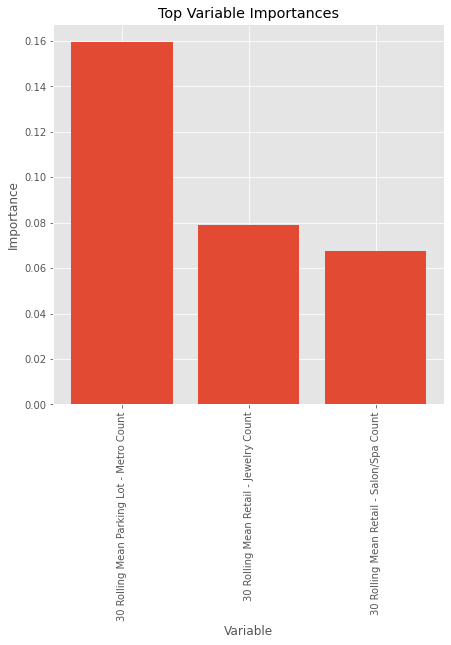

In [621]:
plotImportances(top_importances1, top_features_list1)

In [622]:
len(test_labels1[0])

61

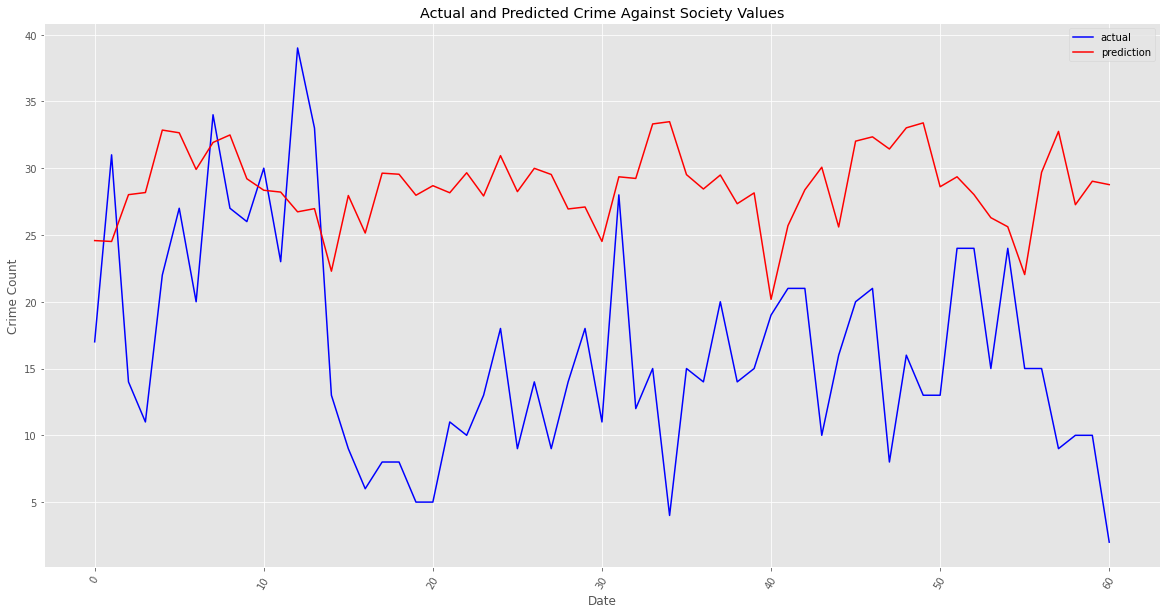

In [623]:
plt.plot(test_labels1[0], 'b-', label = 'actual')# Plot the predicted values
plt.plot(predictions, 'r-', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()# Graph labels
plt.xlabel('Date'); plt.ylabel('Crime Count'); plt.title('Actual and Predicted Crime Against Society Values');
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

In [624]:
crimes_against_property_results = pd.DataFrame({'MAE Scores': [mae_list2[0], mae_list2[1], mae_list2[2], mae_list2[3], mae_list2[4], mae_list2[5],
                                           mae_list2[6], mae_list2[7], mae_list2[8], mae_list2[9], mae_list2[10], mae_list2[11], mae_list2[12], 
                                       mae_list2[13], mae_list2[14], mae_list2[15], mae_list2[16], mae_list2[17], mae_list2[18], mae_list2[19]],
                        'MSE Scores': [mse_list2[0], mse_list2[1], mse_list2[2], mse_list2[3], mse_list2[4], mse_list2[5],
                                           mse_list2[6], mse_list2[7], mse_list2[8], mse_list2[9], mse_list2[10], mse_list2[11], mse_list2[12], 
                                       mse_list2[13], mse_list2[14], mse_list2[15], mse_list2[16], mse_list2[17], mse_list2[18], mse_list2[19]],
                        'MAPE Scores': [mape_list2[0], mape_list2[1], mape_list2[2], mape_list2[3], mape_list2[4], mape_list2[5],
                                           mape_list2[6], mape_list2[7], mape_list2[8], mape_list2[9], mape_list2[10], mape_list2[11], mape_list2[12], 
                                       mape_list2[13], mape_list2[14], mape_list2[15], mape_list2[16], mape_list2[17], mape_list2[18], mape_list2[19]]
                       })

                       
crimes_against_property_results.index = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7',
                'Cluster 8', 'Cluster 9', 'Cluster 10', 'Cluster 11', 'Cluster 12', 'Cluster 13', 'Cluster 14', 'Cluster 15',
                'Cluster 16', 'Cluster 17', 'Cluster 18', 'Cluster 19']

In [625]:
crimes_against_property_results

,MAE Scores,MSE Scores,MAPE Scores
Cluster 0,7.548439,86.095908,0.274517
Cluster 1,7.859257,110.745360,0.226733
Cluster 2,5.662578,48.238497,0.469587
Cluster 3,9.646404,121.170939,0.422363
Cluster 4,6.394691,58.697924,0.479595
Cluster 5,6.664481,80.291933,0.354667
Cluster 6,4.786822,46.191084,0.518991
Cluster 7,8.019505,95.977484,0.220261
Cluster 8,4.095719,28.024667,0.615311
Cluster 9,10.690017,193.414275,0.282002


In [626]:
model.fit(training2[0], train_labels2[0])
predictions2 = model.predict(testing2[0])

/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


In [627]:
importances2 = list(model.feature_importances_)
feature_list2 = list(data_final[0].columns)
feature_importances2 = [(feature, importance) for feature, importance in zip(feature_list2,importances2)]
feature_importances2 = sorted(feature_importances2, key = lambda x: x[1], reverse=True)

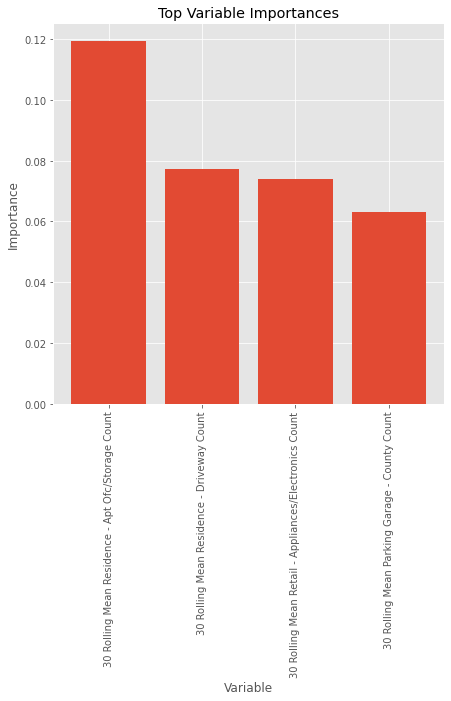

In [628]:
top_features_list2, top_importances2 = getImportances(feature_importances2)
plotImportances(top_importances2, top_features_list2)

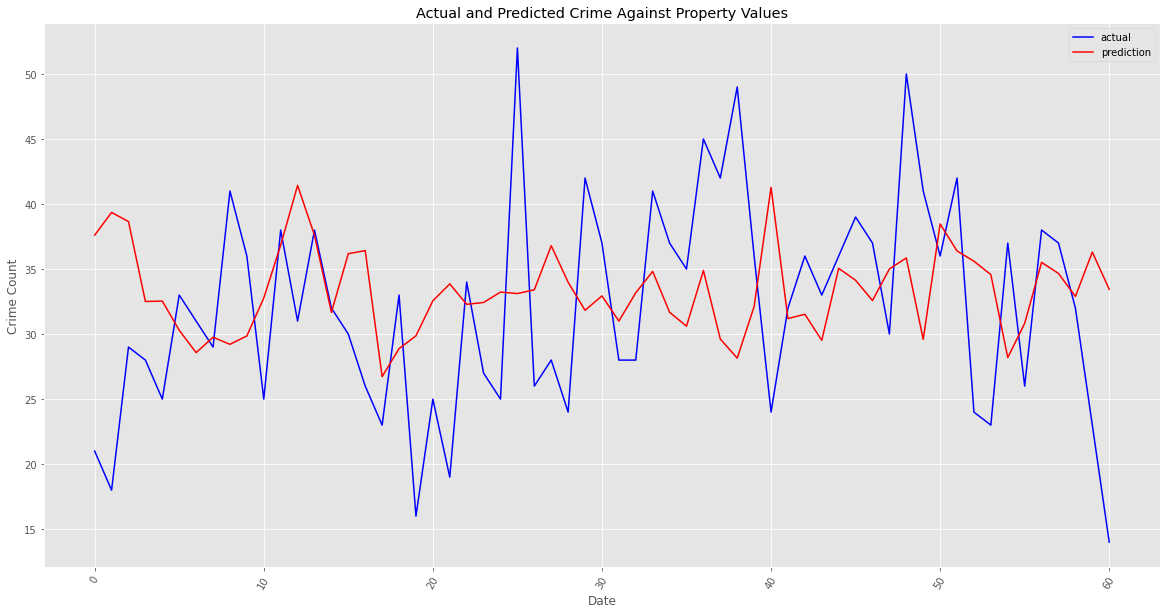

In [629]:
plt.plot(test_labels2[0], 'b-', label = 'actual')# Plot the predicted values
plt.plot(predictions2, 'r-', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()# Graph labels
plt.xlabel('Date'); plt.ylabel('Crime Count'); plt.title('Actual and Predicted Crime Against Property Values');
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

In [630]:
crimes_against_persons_results = pd.DataFrame({'MAE Scores': [mae_list3[0], mae_list3[1], mae_list3[2], mae_list3[3], mae_list3[4], mae_list3[5],
                                           mae_list3[6], mae_list3[7], mae_list3[8], mae_list3[9], mae_list3[10], mae_list3[11], mae_list3[12], 
                                       mae_list3[13], mae_list3[14], mae_list3[15], mae_list3[16], mae_list3[17], mae_list3[18], mae_list3[19]],
                        'MSE Scores': [mse_list3[0], mse_list3[1], mse_list3[2], mse_list3[3], mse_list3[4], mse_list3[5],
                                           mse_list3[6], mse_list3[7], mse_list3[8], mse_list3[9], mse_list3[10], mse_list3[11], mse_list3[12], 
                                       mse_list3[13], mse_list3[14], mse_list3[15], mse_list3[16], mse_list3[17], mse_list3[18], mse_list3[19]],
                        'MAPE Scores': [mape_list3[0], mape_list3[1], mape_list3[2], mape_list3[3], mape_list3[4], mape_list3[5],
                                           mape_list3[6], mape_list3[7], mape_list3[8], mape_list3[9], mape_list3[10], mape_list3[11], mape_list3[12], 
                                       mape_list3[13], mape_list3[14], mape_list3[15], mape_list3[16], mape_list3[17], mape_list3[18], mape_list3[19]]
                       })

                       
crimes_against_persons_results.index = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7',
                'Cluster 8', 'Cluster 9', 'Cluster 10', 'Cluster 11', 'Cluster 12', 'Cluster 13', 'Cluster 14', 'Cluster 15',
                'Cluster 16', 'Cluster 17', 'Cluster 18', 'Cluster 19']

In [631]:
crimes_against_persons_results

,MAE Scores,MSE Scores,MAPE Scores
Cluster 0,3.817143,21.262029,0.524559
Cluster 1,2.450757,9.203392,0.488960
Cluster 2,2.082759,5.967133,0.936997
Cluster 3,1.693286,4.599387,0.668771
Cluster 4,1.646850,4.004927,0.804178
Cluster 5,2.109461,7.326195,0.716928
Cluster 6,1.335192,2.574340,0.670509
Cluster 7,2.749917,11.107846,0.519251
Cluster 8,1.185258,2.147878,0.571689
Cluster 9,2.899367,11.230959,1.272106


In [632]:
model.fit(training3[0], train_labels3[0])
predictions3 = model.predict(testing3[0])

/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


In [633]:
importances3 = list(model.feature_importances_)
feature_list3 = list(data_final[0].columns)
feature_importances3 = [(feature, importance) for feature, importance in zip(feature_list3,importances3)]
feature_importances3 = sorted(feature_importances3, key = lambda x: x[1], reverse=True)

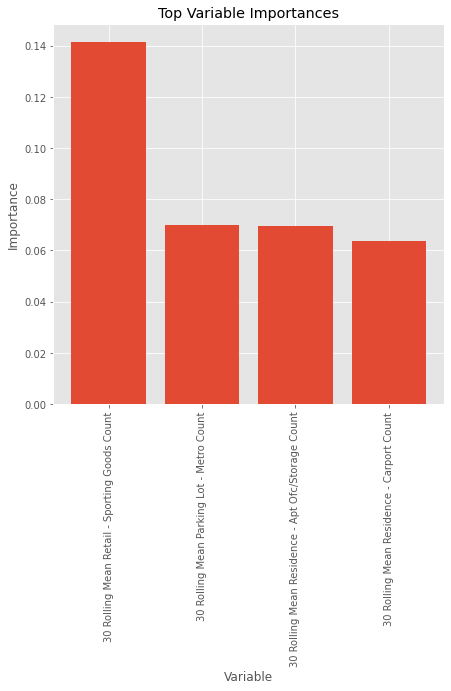

In [634]:
top_features_list3, top_importances3 = getImportances(feature_importances3)
plotImportances(top_importances3, top_features_list3)

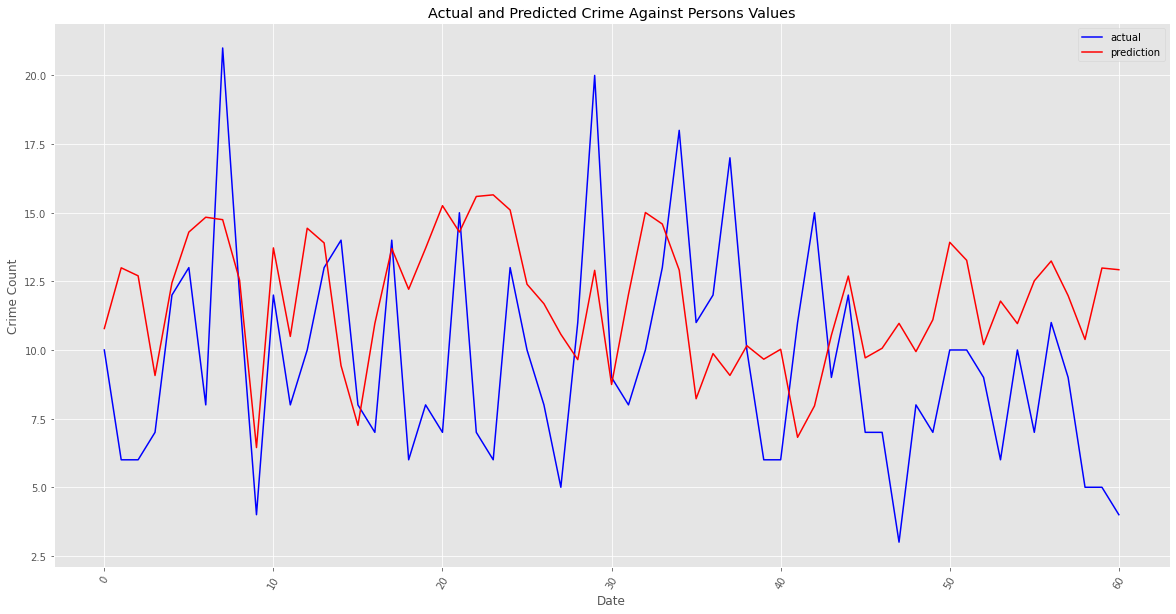

In [635]:
plt.plot(test_labels3[0], 'b-', label = 'actual')# Plot the predicted values
plt.plot(predictions3, 'r-', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()# Graph labels
plt.xlabel('Date'); plt.ylabel('Crime Count'); plt.title('Actual and Predicted Crime Against Persons Values');
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

# Exponential Smoothing Models

In [636]:
training1 = []
training2 = []
training3 = []

testing1 = []
testing2 = []
testing3 = []

for i in range(len(features_list)):
    train = features_list[i]
    test = features_list[i]
    train1 = train[:180]
    train1 = train1['Crime Against Property Count']
    test1 = test[180:]
    test1 = test1['Crime Against Property Count']
    training1.append(train1)
    testing1.append(test1)
    
    train2 = train[:180]
    train2 = train2['Crime Against Society Count']
    test2 = test[180:]
    test2 = test2['Crime Against Society Count']
    training2.append(train2)
    testing2.append(test2)
    
    train3 = train[:180]
    train3 = train3['Crime Against Person Count']
    test3 = test[180:]
    test3 = test3['Crime Against Person Count']
    training3.append(train3)
    testing3.append(test3)

In [637]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

mae_list1 = []
mse_list1 = []
mape_list1 = []

mae_list2 = []
mse_list2 = []
mape_list2 = []

mae_list3 = []
mse_list3 = []
mape_list3 = []

for i in range(len(data_final)):
    
    
    triple_model = ExponentialSmoothing(training1[i],trend='add',seasonal='add').fit()
    preds_triple = triple_model.forecast(61)
    mae1 = mean_absolute_error(testing1[i], preds_triple)
    mse1 = mean_squared_error(testing1[i], preds_triple)
    mape1 = mape(testing1[i], preds_triple)
    mae_list1.append(mae1)
    mse_list1.append(mse1)
    mape_list1.append(mape1)
    
    
    triple_model2 = ExponentialSmoothing(training2[i],trend='add',seasonal='add').fit()
    preds_triple2 = triple_model2.forecast(61)
    mae2 = mean_absolute_error(testing2[i], preds_triple2)
    mse2 = mean_squared_error(testing2[i], preds_triple2)
    mape2 = mape(testing2[i], preds_triple2)
    mae_list2.append(mae2)
    mse_list2.append(mse2)
    mape_list2.append(mape2)
    
    triple_model3 = ExponentialSmoothing(training3[i],trend='add',seasonal='add').fit()
    preds_triple3 = triple_model3.forecast(61)
    mae3 = mean_absolute_error(testing3[i], preds_triple3)
    mse3 = mean_squared_error(testing3[i], preds_triple3)
    mape3 = mape(testing3[i], preds_triple3)
    mae_list3.append(mae3)
    mse_list3.append(mse3)
    mape_list3.append(mape3)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handl

In [638]:
crimes_against_property_results =  pd.DataFrame({'MAE Scores': [mae_list1[0], mae_list1[1], mae_list1[2], mae_list1[3], mae_list1[4], mae_list1[5],
                                           mae_list1[6], mae_list1[7], mae_list1[8], mae_list1[9], mae_list1[10], mae_list1[11], mae_list1[12], 
                                       mae_list1[13], mae_list1[14], mae_list1[15], mae_list1[16], mae_list1[17], mae_list1[18], mae_list1[19]],
                        'MSE Scores': [mse_list1[0], mse_list1[1], mse_list1[2], mse_list1[3], mse_list1[4], mse_list1[5],
                                           mse_list1[6], mse_list1[7], mse_list1[8], mse_list1[9], mse_list1[10], mse_list1[11], mse_list1[12], 
                                       mse_list1[13], mse_list1[14], mse_list1[15], mse_list1[16], mse_list1[17], mse_list1[18], mse_list1[19]],
                        'MAPE Scores': [mape_list1[0], mape_list1[1], mape_list1[2], mape_list1[3], mape_list1[4], mape_list1[5],
                                           mape_list1[6], mape_list1[7], mape_list1[8], mape_list1[9], mape_list1[10], mape_list1[11], mape_list1[12], 
                                       mape_list1[13], mape_list1[14], mape_list1[15], mape_list1[16], mape_list1[17], mape_list1[18], mape_list1[19]]
                       })

                       
crimes_against_property_results.index = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7',
                'Cluster 8', 'Cluster 9', 'Cluster 10', 'Cluster 11', 'Cluster 12', 'Cluster 13', 'Cluster 14', 'Cluster 15',
                'Cluster 16', 'Cluster 17', 'Cluster 18', 'Cluster 19']

In [639]:
crimes_against_property_results

,MAE Scores,MSE Scores,MAPE Scores
Cluster 0,7.525348,87.910571,0.263433
Cluster 1,10.510921,166.841995,0.319891
Cluster 2,5.307976,49.077739,0.447508
Cluster 3,8.500254,105.896634,0.406397
Cluster 4,7.390863,79.938785,0.611196
Cluster 5,6.596610,67.824910,0.348207
Cluster 6,4.223452,34.151731,0.488500
Cluster 7,9.738912,144.477364,0.305307
Cluster 8,4.179322,27.302708,0.794538
Cluster 9,10.339100,179.867613,0.274675


In [640]:
train_data = features[:180]
test_data = features[180:]

In [641]:
triple_model = ExponentialSmoothing(train_data['Crime Against Property Count'],trend='add',seasonal='add').fit()
preds_triple = triple_model.forecast(61)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


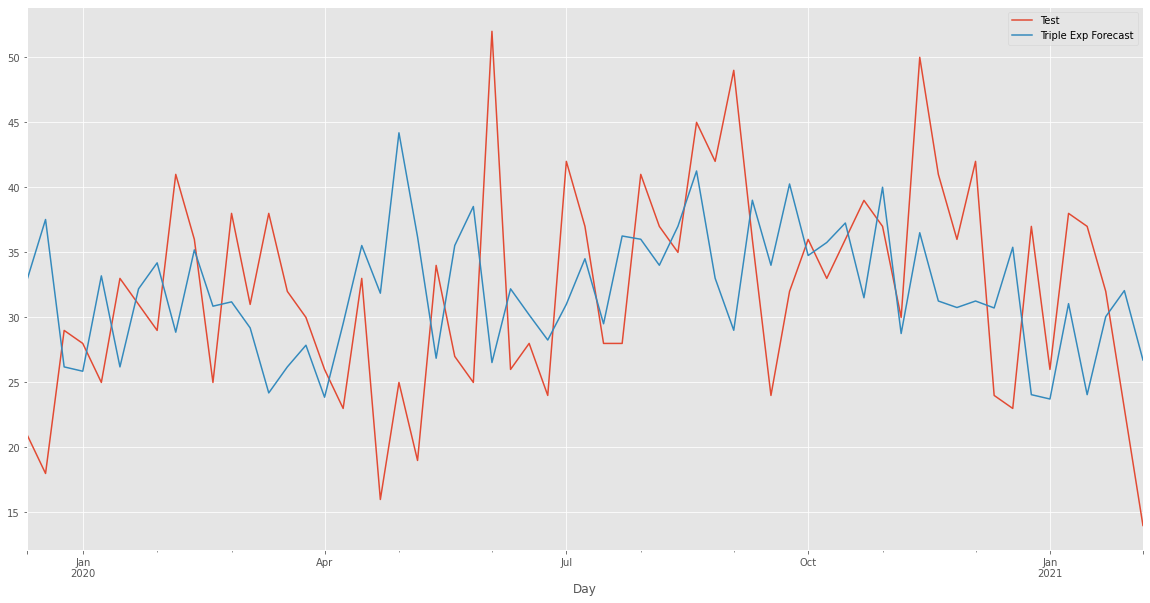

In [642]:
test_data['Crime Against Property Count'].plot(legend=True,label='Test')
preds_triple.plot(legend=True,label='Triple Exp Forecast')
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

In [643]:
mae1 = mean_absolute_error(test_data['Crime Against Property Count'], preds_triple)
mae1

7.525348067806849

In [644]:
mse1 = mean_squared_error(test_data['Crime Against Property Count'], preds_triple)
mse1

87.91057111396135

In [645]:
mape1 = mape(test_data['Crime Against Property Count'], preds_triple)
mape1

0.2634329328630637

In [646]:
crimes_against_society_results = pd.DataFrame({'MAE Scores': [mae_list2[0], mae_list2[1], mae_list2[2], mae_list2[3], mae_list2[4], mae_list2[5],
                                           mae_list2[6], mae_list2[7], mae_list2[8], mae_list2[9], mae_list2[10], mae_list2[11], mae_list2[12], 
                                       mae_list2[13], mae_list2[14], mae_list2[15], mae_list2[16], mae_list2[17], mae_list2[18], mae_list2[19]],
                        'MSE Scores': [mse_list2[0], mse_list2[1], mse_list2[2], mse_list2[3], mse_list2[4], mse_list2[5],
                                           mse_list2[6], mse_list2[7], mse_list2[8], mse_list2[9], mse_list2[10], mse_list2[11], mse_list2[12], 
                                       mse_list2[13], mse_list2[14], mse_list2[15], mse_list2[16], mse_list2[17], mse_list2[18], mse_list2[19]],
                        'MAPE Scores': [mape_list2[0], mape_list2[1], mape_list2[2], mape_list2[3], mape_list2[4], mape_list2[5],
                                           mape_list2[6], mape_list2[7], mape_list2[8], mape_list2[9], mape_list2[10], mape_list2[11], mape_list2[12], 
                                       mape_list2[13], mape_list2[14], mape_list2[15], mape_list2[16], mape_list2[17], mape_list2[18], mape_list2[19]]
                       })

                       
crimes_against_society_results.index = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7',
                'Cluster 8', 'Cluster 9', 'Cluster 10', 'Cluster 11', 'Cluster 12', 'Cluster 13', 'Cluster 14', 'Cluster 15',
                'Cluster 16', 'Cluster 17', 'Cluster 18', 'Cluster 19']

In [647]:
crimes_against_society_results

,MAE Scores,MSE Scores,MAPE Scores
Cluster 0,9.609007,121.834983,1.002248
Cluster 1,17.698260,391.194579,1.825909
Cluster 2,5.655282,46.858463,0.957170
Cluster 3,5.491625,40.272887,1.913925
Cluster 4,4.252037,26.494014,1.735144
Cluster 5,4.169952,23.288805,1.370085
Cluster 6,2.791723,11.257012,1.429603
Cluster 7,16.575625,334.882493,2.330945
Cluster 8,3.174281,13.133206,1.802302
Cluster 9,3.263202,18.854667,0.984556


In [648]:
triple_model = ExponentialSmoothing(train_data['Crime Against Society Count'],trend='add',seasonal='add').fit()
preds_triple = triple_model.forecast(61)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


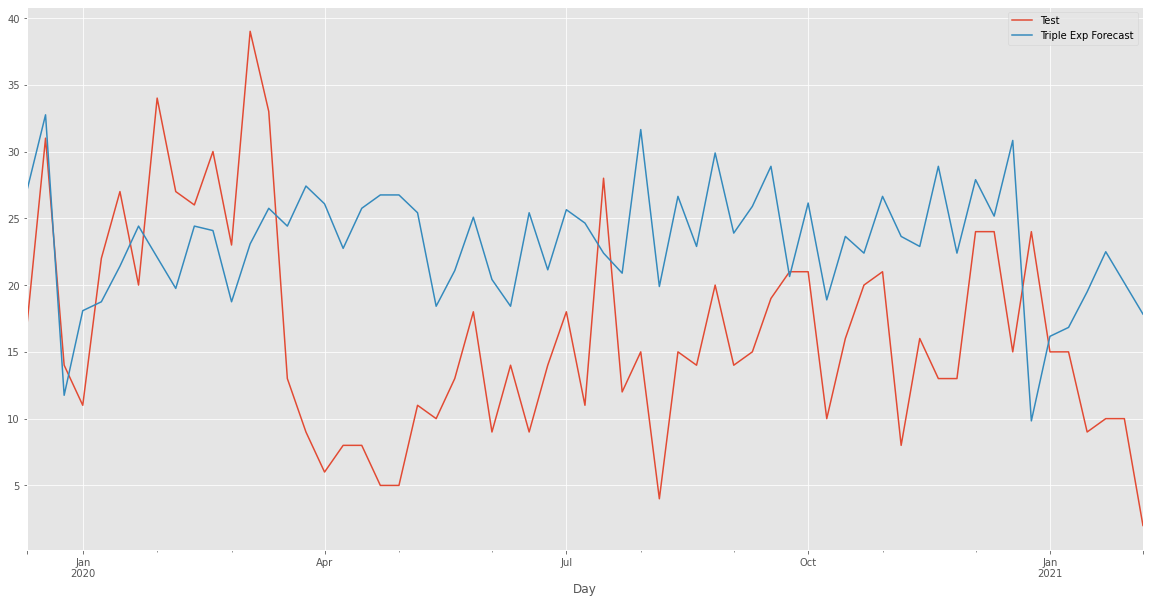

In [649]:
test_data['Crime Against Society Count'].plot(legend=True,label='Test')
preds_triple.plot(legend=True,label='Triple Exp Forecast')
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

In [650]:
mae1 = mean_absolute_error(test_data['Crime Against Society Count'], preds_triple)
mae1

9.609006961839551

In [651]:
mse1 = mean_squared_error(test_data['Crime Against Society Count'], preds_triple)
mse1

121.83498347851616

In [652]:
mape1 = mape(test_data['Crime Against Society Count'], preds_triple)
mape1

1.0022479557972657

In [653]:
crimes_against_persons_results = pd.DataFrame({'MAE Scores': [mae_list3[0], mae_list3[1], mae_list3[2], mae_list3[3], mae_list3[4], mae_list3[5],
                                           mae_list3[6], mae_list3[7], mae_list3[8], mae_list3[9], mae_list3[10], mae_list3[11], mae_list3[12], 
                                       mae_list3[13], mae_list3[14], mae_list3[15], mae_list3[16], mae_list3[17], mae_list3[18], mae_list3[19]],
                        'MSE Scores': [mse_list3[0], mse_list3[1], mse_list3[2], mse_list3[3], mse_list3[4], mse_list3[5],
                                           mse_list3[6], mse_list3[7], mse_list3[8], mse_list3[9], mse_list3[10], mse_list3[11], mse_list3[12], 
                                       mse_list3[13], mse_list3[14], mse_list3[15], mse_list3[16], mse_list3[17], mse_list3[18], mse_list3[19]],
                        'MAPE Scores': [mape_list3[0], mape_list3[1], mape_list3[2], mape_list3[3], mape_list3[4], mape_list3[5],
                                           mape_list3[6], mape_list3[7], mape_list3[8], mape_list3[9], mape_list3[10], mape_list3[11], mape_list3[12], 
                                       mape_list3[13], mape_list3[14], mape_list3[15], mape_list3[16], mape_list3[17], mape_list3[18], mape_list3[19]]
                       })

                       
crimes_against_persons_results.index = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7',
                'Cluster 8', 'Cluster 9', 'Cluster 10', 'Cluster 11', 'Cluster 12', 'Cluster 13', 'Cluster 14', 'Cluster 15',
                'Cluster 16', 'Cluster 17', 'Cluster 18', 'Cluster 19']

In [654]:
crimes_against_persons_results

,MAE Scores,MSE Scores,MAPE Scores
Cluster 0,3.787167,21.793366,0.530061
Cluster 1,2.622312,11.856983,0.621766
Cluster 2,2.704670,10.084114,1.354182
Cluster 3,1.970509,5.609531,0.808823
Cluster 4,1.848889,5.046759,0.947422
Cluster 5,1.992532,6.227321,0.719858
Cluster 6,1.430103,3.187918,0.629292
Cluster 7,3.573047,20.135713,0.794731
Cluster 8,1.182349,1.945707,0.602529
Cluster 9,2.461744,9.122691,1.058642


In [655]:
triple_model = ExponentialSmoothing(train_data['Crime Against Person Count'],trend='add',seasonal='add').fit()
preds_triple = triple_model.forecast(61)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


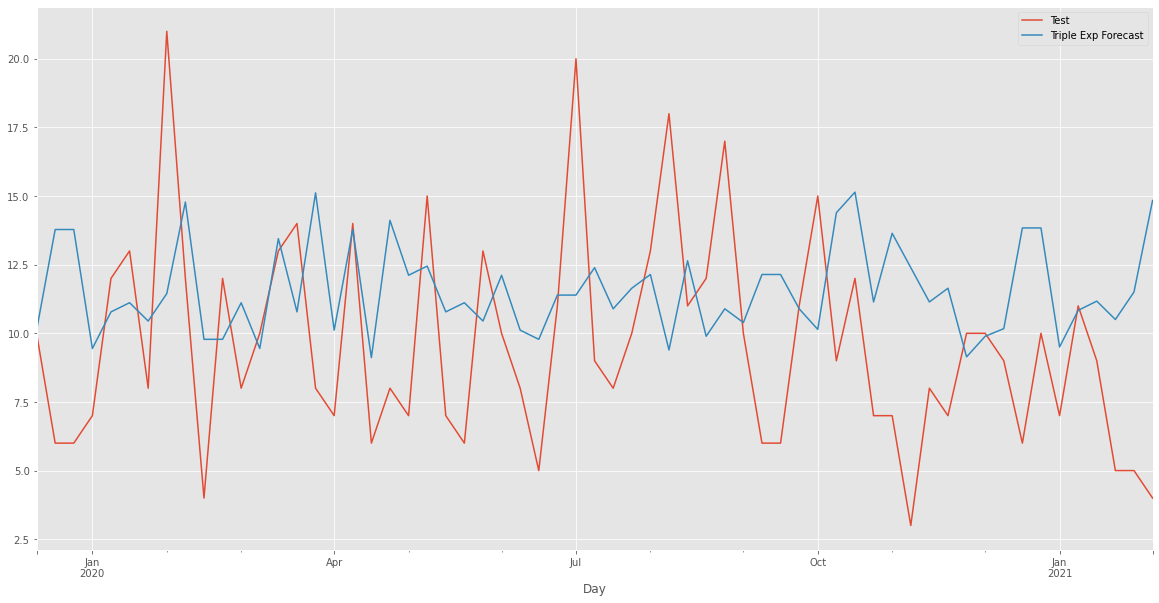

In [656]:
test_data['Crime Against Person Count'].plot(legend=True,label='Test')
preds_triple.plot(legend=True,label='Triple Exp Forecast')
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

In [657]:
mae1 = mean_absolute_error(test_data['Crime Against Person Count'], preds_triple)
mae1

3.7871666675510958

In [658]:
mse1 = mean_squared_error(test_data['Crime Against Person Count'], preds_triple)
mse1

21.793365585573248

In [659]:
mape1 = mape(test_data['Crime Against Person Count'], preds_triple)
mape1

0.5300607658486542